In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['matrix']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
!pip install numpy

In [ ]:
!pip install cvxopt

In [3]:
import cvxpy as cp

1. Установите QP-солвер, разберитесь с его интерфейсом.
2. Протестируйте солвер, решив простую задачу оптимизации в двумерном пространстве:
$$f(\boldsymbol x) = -8x_1 - 16x_2 + x_1^2 + 4x_2^2, \quad \text{s.t.:} \; x_1 + x_2 \leq 5, \; 0 \leq x_1 \leq 3, \; x_2 \geq 0$$
3. Какие из ограничений-неравенств задачи являются _активными_, т.е. влияют на точку оптимума, а какие ограничения можно выбросить и точка оптимума не поменяется?

In [9]:
import numpy as np
from cvxopt import matrix, solvers
P = matrix([[2.0, 0.0],
             [0.0, 8.0]]) #матрица квадратной формв
q = matrix([-8.0, -16.0]) #матрица линейной формы
G = matrix([[ 1.0,  -1.0 , 1.0,0.0],
             [  1.0, 0.0 , 0.0 ,-1.0]]
            )                                 #матрицы огранечений
h = matrix([5.0, 0.0, 3.0, 0.0])
sol = solvers.qp(P, q, G, h) #решение
x_opt = np.array(sol['x']).flatten()
f_opt = sol['primal objective']
print(f"Оптимальные значения: x1 = {x_opt[0]}, x2 = {x_opt[1]}")
print(f"Минимальное значение функции: f(x) = {f_opt}")

print("Активные ограничения:")
for i in range(G.size[0]):  # проходим по всем ограничениям
    left_side = np.dot(np.array(G[i, :]).flatten(), x_opt)  # левая часть
    right_side = h[i]  # правая часть
    if abs(left_side - right_side) < 1e-6:  # используем толерантность для сравнения
        print(f"Ограничение {i + 1} активно: {G[i,:]} * x <= {h[i]}")



     pcost       dcost       gap    pres   dres
 0: -3.0512e+01 -3.8829e+01  8e+00  0e+00  2e-01
 1: -3.0792e+01 -3.1146e+01  4e-01  2e-16  5e-03
 2: -3.0982e+01 -3.1024e+01  4e-02  1e-16  4e-04
 3: -3.0997e+01 -3.1003e+01  6e-03  2e-16  5e-17
 4: -3.1000e+01 -3.1000e+01  7e-04  2e-16  3e-17
 5: -3.1000e+01 -3.1000e+01  1e-04  2e-16  4e-17
 6: -3.1000e+01 -3.1000e+01  1e-05  2e-16  3e-17
Optimal solution found.
Оптимальные значения: x1 = 2.9999998301061535, x2 = 1.9986909284531613
Минимальное значение функции: f(x) = -30.99999280553902
Активные ограничения:
Ограничение 3 активно: [ 1.00e+00  0.00e+00]
 * x <= 3.0


# **Графическое решение**

In [ ]:
pip install matplotlib

<ipython-input-10-7bd780af2ac7>:16: UserWarning: linewidths is ignored by contourf
  contourf(x1, x2, constr1 & constr2 & constr3, 1, alpha=0.5, linewidths=4, cmap='gray')


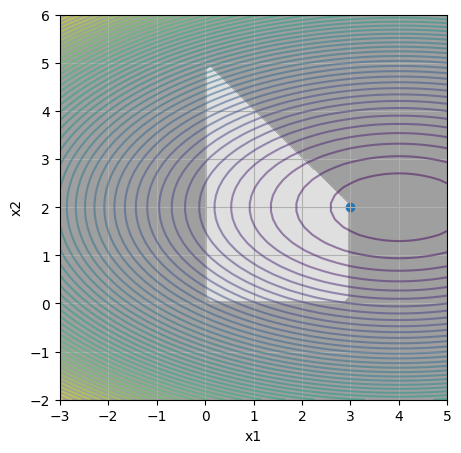

In [ ]:
x1 = linspace(-3, 5, 50)
x2 = linspace(-2, 6, 50)
xx1, xx2 = meshgrid(x1, x2)

f = -8*xx1 - 16*xx2 + xx1**2 + 4*xx2**2
constr1 = (xx1 + xx2 <= 5)
constr2 = (0 <= xx1) & (xx1 <= 3)
constr3 = (xx2 >= 0)

figure(figsize=(5, 5))
grid(True)
xlabel('x1')
ylabel('x2')

contour(x1, x2, f, 50, alpha=0.5)
contourf(x1, x2, constr1 & constr2 & constr3, 1, alpha=0.5, linewidths=4, cmap='gray')
_ = scatter([3], [2])

In [ ]:
from sklearn.datasets import make_classification

#### Задание
  1. Сведите задачу обучения линейного SVM к QP, реализуйте процедуру обучения Линейного SVM при помощи QP-солвера.
  2. Сгенерируйте три случайные двумерные выборки для бинарной классификации:
    - с линейно-разделимыми классами
    - с хорошо разделимыми классами, но не линейно
    - с плохо разделимыми классами по имеющимся признакам
  3. Протестируйте линейный SVM на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Постройте классификаторы с различным значением параметра $C$.
  4. Как зависит число опорных векторов от параметра $C$ для различных выборок?
  5. Используя явное преобразование признаков обучите методом опорных векторов квадратичную разделяющую поверхность. Покажите ее на плоскости.

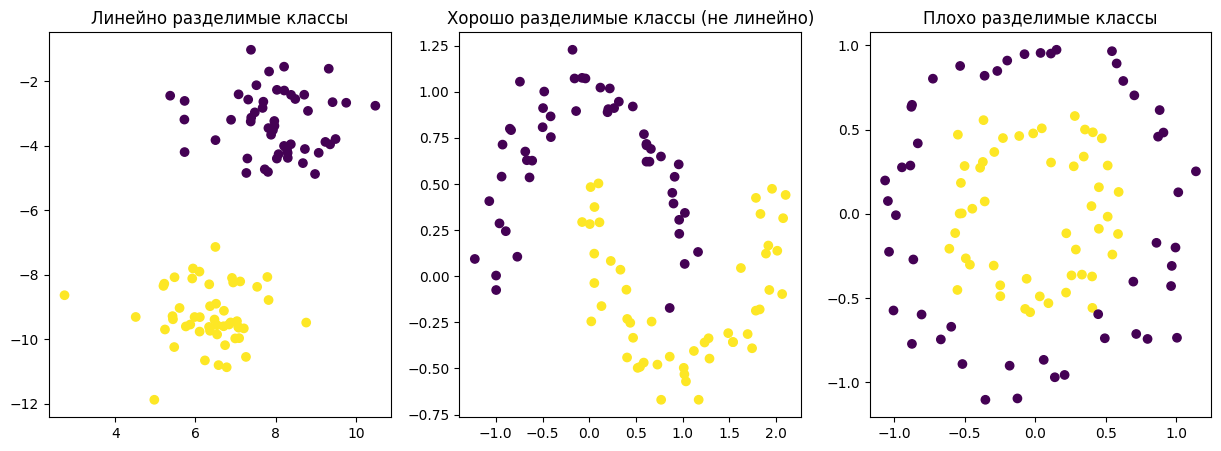

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

# Линейно разделимые классы
X1, y1 = make_blobs(n_samples=100, centers=2, random_state=6)

# Хорошо разделимые классы, но не линейно
X2, y2 = make_moons(n_samples=100, noise=0.1, random_state=6)

# Плохо разделимые классы
X3, y3 = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=6)

# Визуализация выборок
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.title('Линейно разделимые классы')

plt.subplot(1, 3, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.title('Хорошо разделимые классы (не линейно)')

plt.subplot(1, 3, 3)
plt.scatter(X3[:, 0], X3[:, 1], c=y3)
plt.title('Плохо разделимые классы')

plt.show()

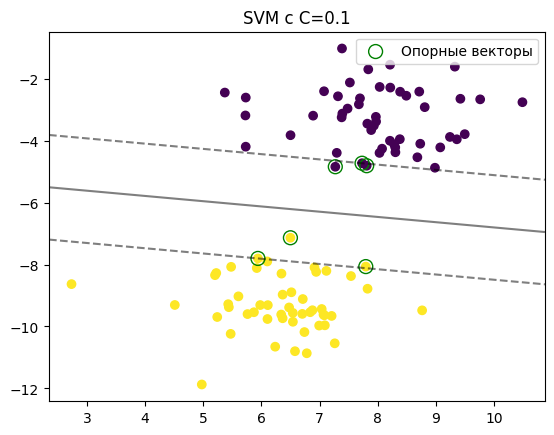

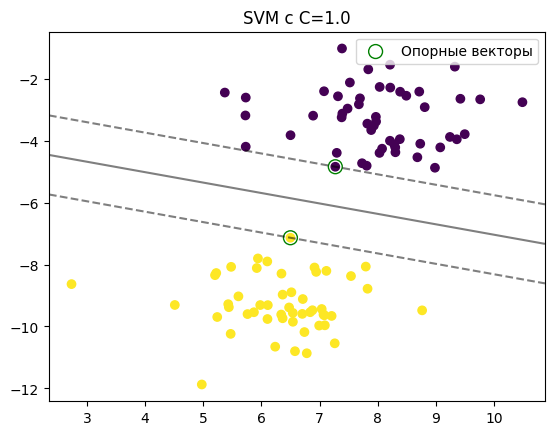

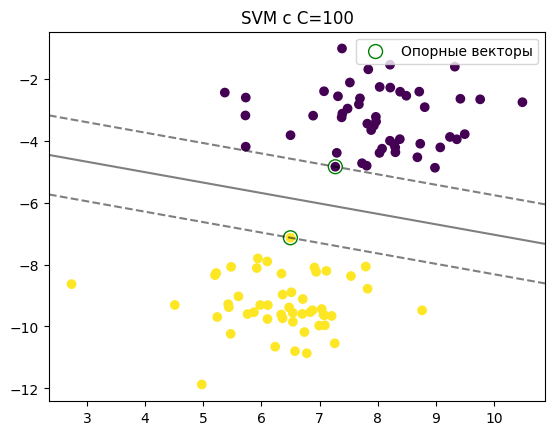

In [33]:
from sklearn.svm import SVC

def plot_svm(X, y, C):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y) #обучает модель на данных X и y

    plt.scatter(X[:, 0], X[:, 1], c=y) #Данный вызов создает рассеяный график для двух признаков из X,Параметр c=y окрашивает точки в зависимости от их классов.

    # Визуализация опорных векторов
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='green', label='Опорные векторы')

    # Построение границы принятия решения
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx) #Координатная сетка
    xy = np.vstack([XX.ravel(), YY.ravel()]).T #Возвращает непрерывный сглаженный массив
    Z = svm.decision_function(xy).reshape(XX.shape) #вычисляется значение функции принятия решения SVM для всех точек в сетке, после чего результат преобразуется в нужную форму

    # Уровни для границ
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    plt.title(f'SVM с C={C}')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
    plt.show()

# Тестирование на выборках с различными значениями C
Cs = [0.1, 1.0, 100]
for C in Cs:
    plot_svm(X1, y1, C)

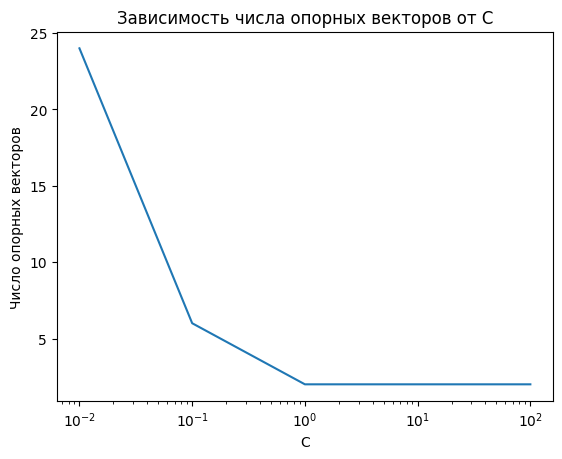

In [16]:
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]
n_support_vectors = []

for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X1, y1)
    n_support_vectors.append(len(svm.support_vectors_))

plt.plot(C_values, n_support_vectors)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Число опорных векторов')
plt.title('Зависимость числа опорных векторов от C')
plt.show()

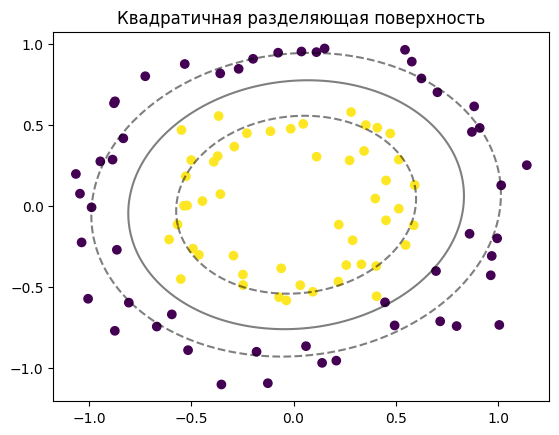

In [19]:
from sklearn.preprocessing import PolynomialFeatures

# Преобразование признаков
poly = PolynomialFeatures(degree=2) #генерировать полиномиальные признаки второго порядка
X_poly = poly.fit_transform(X3) #исходные признаки, так и новые полиномиальные признаки

# Обучение SVM на полиномиальных признаках
svm_poly = SVC(kernel='linear')
svm_poly.fit(X_poly, y3)

# Визуализация квадратичной разделяющей поверхности
def plot_quadratic_svm(X):
    plt.scatter(X[:, 0], X[:, 1], c=y3)

    ax = plt.gca() # Получаем текущие оси графика
    xlim = ax.get_xlim()  # Получаем пределы по оси X
    ylim = ax.get_ylim()  # Получаем пределы по оси Y

   xx = np.linspace(xlim[0], xlim[1], 100)  # Генерируем 100 значений для оси X
    yy = np.linspace(ylim[0], ylim[1], 100)  # Генерируем 100 значений для оси Y
    YY, XX = np.meshgrid(yy, xx)  # Создаем сетку координат
    xy = np.vstack([XX.ravel(), YY.ravel()]).T #объединяет сетку значений XX и YY в одном массиве.
    Z = svm_poly.decision_function(poly.transform(xy)).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--']) #Создает контурные линии на графике

    plt.title('Квадратичная разделяющая поверхность')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

plot_quadratic_svm(X3)

#### Задание
  1. Реализуйте процедуру обучения ядрового SVM, используя QP-солвер.
  2. Протестируйте на случайных двумерных выборках ядровой SVM. Покажите на плоскости строящиеся разделяющие поверхности, линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Попробуйте следующие ядровые функции:
    - линейная: $k(x, x') = x^Tx'$
    - полиномиальная: $k(x, x') = (x^Tx' + 1)^p$ с различными степенями $p = 2,3,\dots$
    - Гауссовская-RBF: $k(x, x') = \exp(-\frac{1}{2\gamma}\|x - x'\|^2)$
  3. Как ведет себя SVM с полиномиальным ядром в зависимости от параметров $C$ и степени ядра $p$?
  4. Как ведет себя SVM с RBF-ядром в зависимости от параметров $C$ и $\gamma$? Поварьируйте параметры $C$ и $\gamma$ по логарифмической сетке. Какие значения параметров ведут к переобучению, а какие — к слишком грубой модели?
  

     pcost       dcost       gap    pres   dres
 0: -5.3128e+01 -2.2394e+01  6e+02  2e+01  2e-15
 1: -7.8646e+00 -2.1535e+01  2e+01  3e-01  2e-15
 2: -8.2232e+00 -9.6037e+00  1e+00  7e-03  7e-16
 3: -8.7192e+00 -9.4303e+00  7e-01  3e-03  5e-16
 4: -8.9202e+00 -9.3121e+00  4e-01  2e-03  6e-16
 5: -9.0781e+00 -9.2048e+00  1e-01  4e-04  7e-16
 6: -9.1217e+00 -9.1860e+00  6e-02  1e-04  6e-16
 7: -9.1546e+00 -9.1601e+00  6e-03  2e-06  7e-16
 8: -9.1571e+00 -9.1572e+00  7e-05  2e-08  7e-16
 9: -9.1572e+00 -9.1572e+00  7e-07  2e-10  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.6569e+01 -2.4325e+02  7e+02  2e+00  4e-15
 1: -7.1806e+01 -1.6678e+02  9e+01  3e-16  3e-15
 2: -8.3320e+01 -9.7019e+01  1e+01  2e-16  3e-15
 3: -8.7998e+01 -9.1310e+01  3e+00  2e-16  2e-15
 4: -8.9186e+01 -9.0008e+01  8e-01  2e-16  3e-15
 5: -8.9487e+01 -8.9667e+01  2e-01  2e-16  2e-15
 6: -8.9557e+01 -8.9596e+01  4e-02  2e-16  3e-15
 7: -8.9574e+01 -8.9578e+01  5e-03  2e-16  2e-1

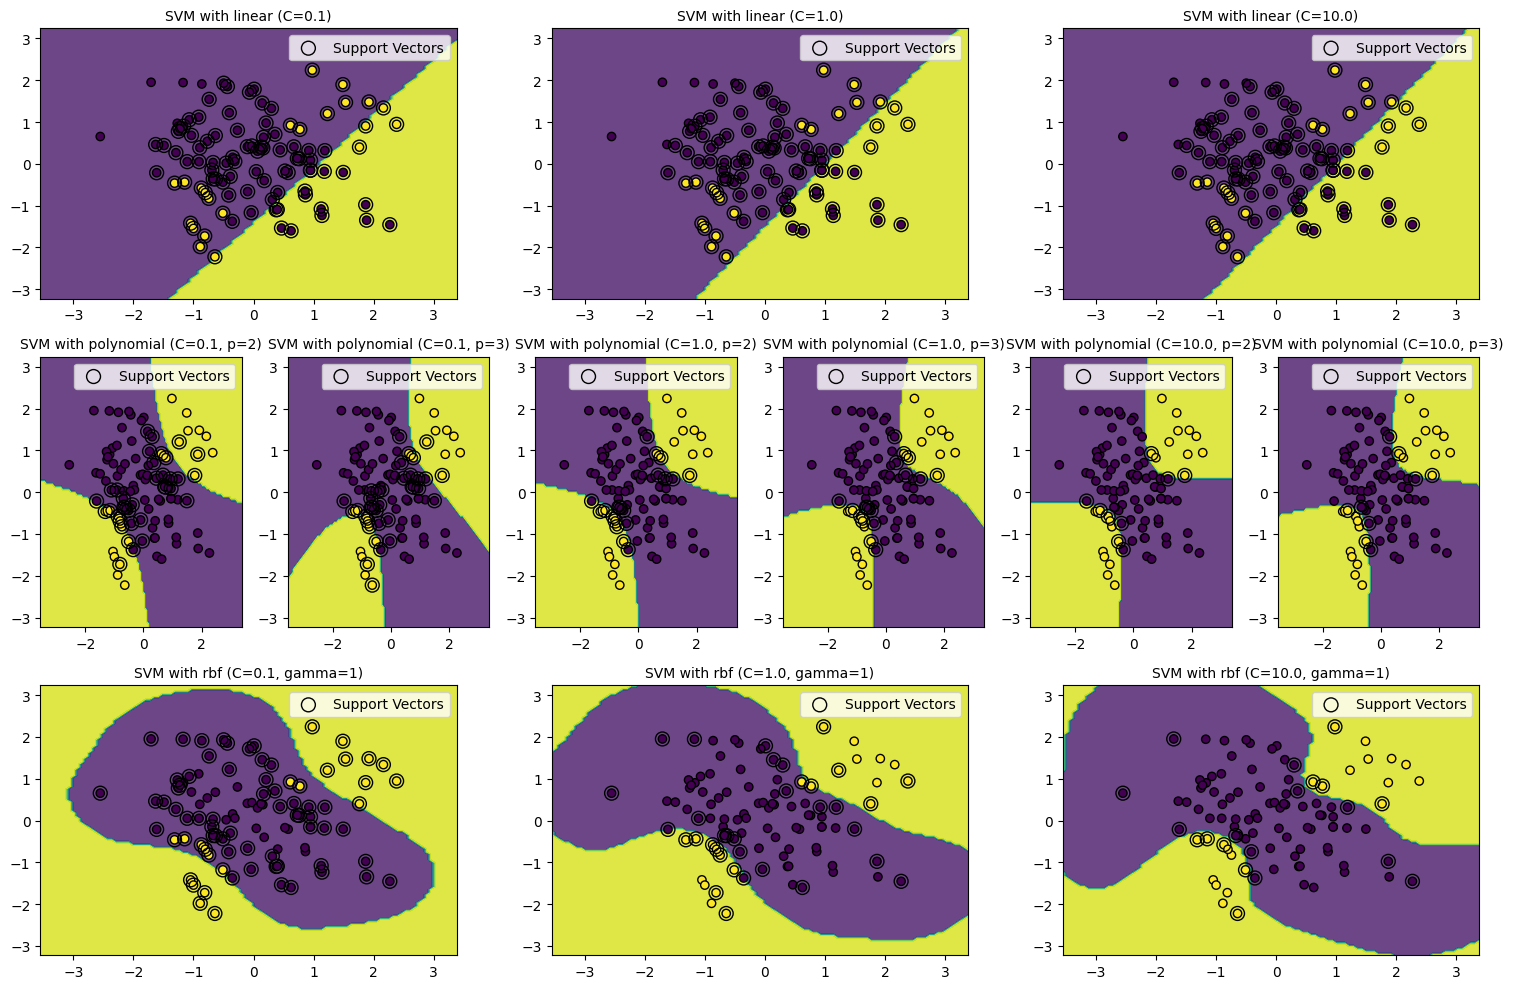

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

class SVM:
    def __init__(self, kernel='linear', C=1.0, p=3, gamma=None): #kernel: тип ядра, используемого в SVM.
                                                                  #C: параметр регуляризации.
                                                                  #p: степень полиномиального ядра.
                                                                  #gamma: параметр ядра радиальной базисной функции (RBF).
        self.kernel = kernel
        self.C = C
        self.p = p
        self.gamma = gamma
        self.alpha = None
        self.support_vectors = None
        self.support_vector_labels = None
        self.b = 0.0

    def fit(self, X, y):
        n_samples, n_features = X.shape #Вычисляет матрицу ядра K для образцов.
        K = self._kernel(X, X)

        # Формирование матрицы Q для QP
        P = matrix(np.outer(y, y) * K)  #внешнее произведение двух векторов
        q = matrix(-np.ones(n_samples)) #определяет ограничения на значения альфа
        G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
        h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * self.C)))

        # Решение QP задачи
        sol = solvers.qp(P, q, G, h)
        self.alpha = np.array(sol['x']).flatten()

        # Опорные векторы
        sv_indices = self.alpha > 1e-5
        self.support_vectors = X[sv_indices]
        self.support_vector_labels = y[sv_indices]
        self.alpha = self.alpha[sv_indices]

        # Вычисление b
        self.b = np.mean([y_i - np.sum(self.alpha * self.support_vector_labels * K[i][sv_indices])
                          for i, y_i in zip(np.where(sv_indices)[0], self.support_vector_labels)])

    def _kernel(self, X1, X2):
        if self.kernel == 'linear':
            return np.dot(X1, X2.T)
        elif self.kernel == 'polynomial':
            return (np.dot(X1, X2.T) + 1) ** self.p
        elif self.kernel == 'rbf':
            if self.gamma is None:
                raise ValueError("Gamma must be set for RBF kernel")
            sq_dists = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
            return np.exp(-self.gamma * sq_dists)
        else:
            raise ValueError("Unknown kernel")

    def predict(self, X):
        K = self._kernel(X, self.support_vectors)
        return np.sign(np.dot(K, self.alpha * self.support_vector_labels) + self.b)

def generate_data(n_samples=100):
    np.random.seed(0)
    X = np.random.randn(n_samples, 2)
    y = np.sign(X[:, 0] * X[:, 1] - 0.5)  # Простая функция для разделения классов
    return X, y

def plot_decision_boundary(svm, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    if svm.support_vectors is not None:
        plt.scatter(svm.support_vectors[:, 0], svm.support_vectors[:, 1], s=100,
                    facecolors='none', edgecolors='k', marker='o', label='Support Vectors')
    plt.legend()

X, y = generate_data()

# Обучение SVM с разными ядрами
kernels = ['linear', 'polynomial', 'rbf']
p_values = [2, 3]
C_values = [0.1, 1.0, 10.0]
gamma_value = 1

plt.figure(figsize=(15, 10))

for i, kernel in enumerate(kernels):
    for j, C in enumerate(C_values):
        if kernel == 'polynomial':
            for p in p_values:
                svm = SVM(kernel=kernel, C=C, p=p)
                svm.fit(X, y)
                plt.subplot(len(kernels), len(C_values) * len(p_values),
                            i * len(C_values) * len(p_values) + j * len(p_values) + (p - 2) + 1)
                plt.title(f'SVM with {kernel} (C={C}, p={p})', fontsize=10)
                plot_decision_boundary(svm, X, y)
        elif kernel == 'rbf':
            svm = SVM(kernel=kernel, C=C, gamma=gamma_value)
            svm.fit(X, y)
            plt.subplot(len(kernels), len(C_values), i * len(C_values) + j + 1)
            plt.title(f'SVM with {kernel} (C={C}, gamma={gamma_value})', fontsize=10)
            plot_decision_boundary(svm, X, y)
        else:
            svm = SVM(kernel=kernel, C=C)
            svm.fit(X, y)
            plt.subplot(len(kernels), len(C_values), i * len(C_values) + j + 1)
            plt.title(f'SVM with {kernel} (C={C})', fontsize=10)
            plot_decision_boundary(svm, X, y)

# Увеличить пространство между подграфиками
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.tight_layout()
plt.show()
